In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
#aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))


In [2]:
dataset = pd.read_csv("Toxicity.csv")
dataset

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [3]:
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [4]:
dataset = remove_unwanted_cols(dataset, ['Unnamed: 0'])
dataset

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [5]:
dataset = dataset.rename(columns={'tweet' : 'text'})
dataset

,Toxicity,text
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [6]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

dataset['text'] = dataset['text'].apply(cleanText)
dataset



,Toxicity,text
0,0,@user when a father is dysfunctional and is so...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie “@lifeasking: @20_pear...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like i ain...
56743,1,youu got wild bitches tellin you lies


C:\Users\Tunahan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Toxicity', ylabel='count'>

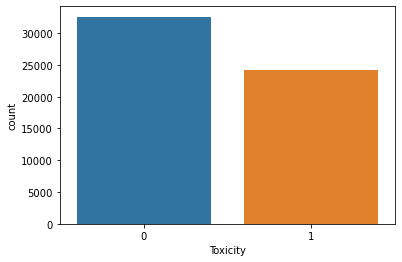

In [7]:
import seaborn as sns

sns.countplot(dataset.Toxicity)

In [8]:
def preprocess_text(text):
    text.lower()
    # Remove urls
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text_tokens = word_tokenize(text)
    filtered_words = [w for w in text_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    
    
    return " ".join(filtered_words)

dataset['text'] = dataset['text'].apply(preprocess_text)
dataset

,Toxicity,text
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty
3,0,model love u take u time urð± ðððð...
4,0,factsguide society motivation
...,...,...
56740,1,yous muthafin lie “ right tl trash … mine bibl...
56741,1,youve gone broke wrong heart baby drove rednec...
56742,1,young buck wan na eat dat nigguh like aint fuc...
56743,1,youu got wild bitches tellin lies


In [9]:
dataset['Toxicity'].value_counts()

0    32592
1    24153
Name: Toxicity, dtype: int64

In [10]:
# Removing the stop words
from gensim.parsing.preprocessing import remove_stopwords

dataset['text'] = dataset['text'].apply(remove_stopwords)
dataset

,Toxicity,text
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause dont offer wheelc...
2,0,bihday majesty
3,0,model love u u time urð± ðððð ð...
4,0,factsguide society motivation
...,...,...
56740,1,yous muthafin lie “ right tl trash … bible scr...
56741,1,youve gone broke wrong heart baby drove rednec...
56742,1,young buck wan na eat dat nigguh like aint fuc...
56743,1,youu got wild bitches tellin lies


In [11]:
train, test = train_test_split(dataset, test_size= 0.000001, random_state=42)

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens

In [12]:
from gensim.models.doc2vec import TaggedDocument
import nltk
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.Toxicity]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.Toxicity]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(dataset['text'].values)
X = tokenizer.texts_to_sequences(dataset['text'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

Found 56745 unique tokens.


In [13]:
X = tokenizer.texts_to_sequences(dataset['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (56745, 50)


In [14]:
train_tagged.values[30]

TaggedDocument(words=['creative', 'day', 'yall', 'remember', 'smile', 'plus', 'friday', 'credit', 'maa', 'altã©s', 'illustration'], tags=[0])

In [15]:
from gensim.models import Doc2Vec
from tqdm import tqdm
from sklearn import utils

model_dbow = Doc2Vec(dm=1, dm_mean=1, size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

C:\Users\Tunahan\anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 56744/56744 [00:00<00:00, 3630618.82it/s]


In [16]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 56744/56744 [00:00<00:00, 3155222.47it/s]


Wall time: 1min 14s


In [17]:
print(model_dbow)

Doc2Vec(dm/m,d20,n5,w8,s0.001)


In [18]:
len(model_dbow.wv.vocab)


61261

In [19]:
from gensim.models import KeyedVectors


# save the vectors in a new matrix
embedding_matrix = np.zeros((len(model_dbow.wv.vocab)+ 1, 20))

for i, vec in enumerate(model_dbow.docvecs.vectors_docs):
    while i in vec <= 1000:
    #print(i)
    #print(model.docvecs)
        embedding_matrix[i]=vec
    #print(vec)
    #print(vec[i])

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


# init layer
model = Sequential()

# emmbed word vectors
model.add(Embedding(len(model_dbow.wv.vocab)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))


In [21]:
# learn the correlations
def split_input(sequence):
    return sequence[:-1], tf.reshape(sequence[1:], (-1,1))

In [22]:
model.add(LSTM(50,return_sequences=False))
model.add(Dense(2,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 20)            1225240   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                14200     
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 1,239,542
Trainable params: 1,239,542
Non-trainable params: 0
_________________________________________________________________


In [23]:
Y = pd.get_dummies(dataset['Toxicity']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(48233, 50) (48233, 2)
(8512, 50) (8512, 2)


In [24]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =30, batch_size=batch_size, verbose = 2)

Epoch 1/30
1508/1508 - 49s - loss: 0.2014 - acc: 0.9183
Epoch 2/30
1508/1508 - 50s - loss: 0.0830 - acc: 0.9702
Epoch 3/30
1508/1508 - 50s - loss: 0.0471 - acc: 0.9840
Epoch 4/30
1508/1508 - 50s - loss: 0.0324 - acc: 0.9893
Epoch 5/30
1508/1508 - 51s - loss: 0.0230 - acc: 0.9931
Epoch 6/30
1508/1508 - 51s - loss: 0.0176 - acc: 0.9944
Epoch 7/30
1508/1508 - 51s - loss: 0.0143 - acc: 0.9954
Epoch 8/30
1508/1508 - 50s - loss: 0.0110 - acc: 0.9965
Epoch 9/30
1508/1508 - 62s - loss: 0.0095 - acc: 0.9968
Epoch 10/30
1508/1508 - 52s - loss: 0.0073 - acc: 0.9977
Epoch 11/30
1508/1508 - 52s - loss: 0.0061 - acc: 0.9981
Epoch 12/30
1508/1508 - 51s - loss: 0.0049 - acc: 0.9984
Epoch 13/30
1508/1508 - 52s - loss: 0.0047 - acc: 0.9983
Epoch 14/30
1508/1508 - 56s - loss: 0.0042 - acc: 0.9985
Epoch 15/30
1508/1508 - 53s - loss: 0.0041 - acc: 0.9986
Epoch 16/30
1508/1508 - 53s - loss: 0.0026 - acc: 0.9991
Epoch 17/30
1508/1508 - 51s - loss: 0.0025 - acc: 0.9990
Epoch 18/30
1508/1508 - 53s - loss: 0.00

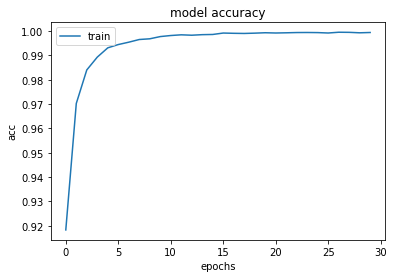

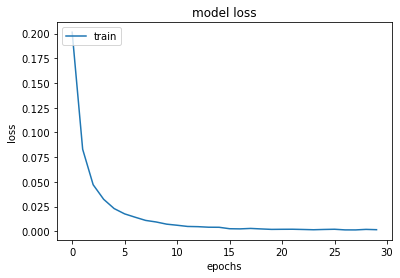

In [25]:
import matplotlib.pyplot as plt


plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

247/247 [==============================] - 2s 7ms/step - loss: 0.6176 - acc: 0.9184
score: 0.62
acc: 0.92


In [27]:
def isToxic(txt):
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=200, dtype='int32', value=0)
    pred = model.predict(padded)
    labels = [0,1]
    result = labels[np.argmax(pred)]
    result_dict = {0: 'Not toxic' , 1: 'Toxic'}
    print(result_dict[result])
    return result

In [28]:
m = "retweet if you agree!"
isToxic([m])

Toxic


1

In [29]:
m = "as we all know, essential oils are not made of chemicals."
isToxic([m])

Not toxic


0

In [31]:
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset

In [32]:
# Load dataset
dataset2 = load_dataset("stock_data.csv", ['Text' , 'Sentiment'])

dataset2

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off dayâs high, up...",1


In [33]:
sentiment  = {-1: 0, 1: 1} 

dataset2.Sentiment = [sentiment[item] for item in dataset2.Sentiment] 
dataset2

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off dayâs high, up...",1


C:\Users\Tunahan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

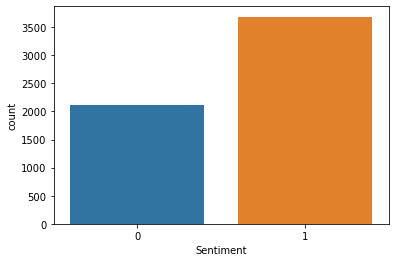

In [34]:
sns.countplot(dataset2.Sentiment)

In [35]:
fnc_dataset = dataset2
fnc_dataset

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off dayâs high, up...",1


C:\Users\Tunahan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

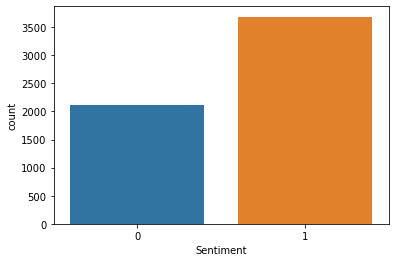

In [36]:
sns.countplot(fnc_dataset.Sentiment)

In [37]:
fnc_dataset['Text'] = fnc_dataset['Text'].apply(cleanText)
fnc_dataset

,Text,Sentiment
0,kickers on my watchlist ide tit soq pnk cpw bp...,1
1,user: aap movie. 55% return for the fea/geed i...,1
2,user i'd be afraid to short amzn - they are lo...,1
3,mnta over 12.00,1
4,oi over 21.37,1
...,...,...
5786,industry body cii said #discoms are likely to ...,0
5787,"#gold prices slip below rs 46,000 as #investor...",0
5788,workers at bajaj auto have agreed to a 10% wag...,1
5789,"#sharemarket live: sense off dayâs high, up ...",1


In [38]:
fnc_dataset['Sentiment'].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

In [39]:
fnc_dataset['Text'] = fnc_dataset['Text'].apply(remove_stopwords)
fnc_dataset

,Text,Sentiment
0,kickers watchlist ide tit soq pnk cpw bpz aj t...,1
1,user: aap movie. 55% return fea/geed indicator...,1
2,user i'd afraid short amzn - looking like near...,1
3,mnta 12.00,1
4,oi 21.37,1
...,...,...
5786,industry body cii said #discoms likely suffer ...,0
5787,"#gold prices slip rs 46,000 #investors book pr...",0
5788,workers bajaj auto agreed 10% wage cut period ...,1
5789,"#sharemarket live: sense dayâs high, 600 poi...",1


In [40]:
f_train, f_test = train_test_split(fnc_dataset, test_size= 0.000001, random_state=42)


In [41]:
f_train_tagged = f_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['Text']), tags=[r.Sentiment]), axis=1)
f_test_tagged = f_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['Text']), tags=[r.Sentiment]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(fnc_dataset['Text'].values)
X = tokenizer.texts_to_sequences(fnc_dataset['Text'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

Found 5791 unique tokens.


In [42]:
X = tokenizer.texts_to_sequences(fnc_dataset['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5791, 50)


In [43]:
f_train_tagged.values[30]

TaggedDocument(words=['sizemore', 'fo', ':', 'cashing', 'echo', 'boomers', '-', 'sizemore', 'insights', 'abt', 'mjn', 'bbby', 'kmb'], tags=[1])

In [44]:
f_model_dbow = Doc2Vec(dm=1, dm_mean=1, size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
f_model_dbow.build_vocab([x for x in tqdm(f_train_tagged.values)])

C:\Users\Tunahan\anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 5790/5790 [00:00<00:00, 724083.01it/s]


In [45]:
%%time
for epoch in range(30):
    f_model_dbow.train(utils.shuffle([x for x in tqdm(f_train_tagged.values)]), total_examples=len(f_train_tagged.values), epochs=1)
    f_model_dbow.alpha -= 0.002
    f_model_dbow.min_alpha = f_model_dbow.alpha

100%|██████████| 5790/5790 [00:00<?, ?it/s]


Wall time: 8.49 s


In [46]:
print(f_model_dbow)

Doc2Vec(dm/m,d20,n5,w8,s0.001)


In [47]:
len(f_model_dbow.wv.vocab)


11191

In [48]:
# save the vectors in a new matrix
f_embedding_matrix = np.zeros((len(f_model_dbow.wv.vocab)+ 2, 20))

for i, vec in enumerate(f_model_dbow.docvecs.vectors_docs):
    while i in vec <= 1000:
    #print(i)
    #print(model.docvecs)
        f_embedding_matrix[i]=vec
    #print(vec)
    #print(vec[i])

In [49]:
# init layer
f_model = Sequential()

# emmbed word vectors
f_model.add(Embedding(len(f_model_dbow.wv.vocab)+2,20,input_length=X.shape[1],weights=[f_embedding_matrix],trainable=True))

# learn the correlations
def split_input(sequence):
    return sequence[:-1], tf.reshape(sequence[1:], (-1,1))


f_model.add(LSTM(50,return_sequences=False))
f_model.add(Dense(2,activation="softmax"))

# output model skeleton
f_model.summary()
f_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 20)            223860    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                14200     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 238,162
Trainable params: 238,162
Non-trainable params: 0
_________________________________________________________________


In [50]:
Y = pd.get_dummies(fnc_dataset['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4922, 50) (4922, 2)
(869, 50) (869, 2)


In [51]:
batch_size = 32
history=f_model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)

Epoch 1/50
154/154 - 3s - loss: 0.5971 - acc: 0.6741
Epoch 2/50
154/154 - 3s - loss: 0.3332 - acc: 0.8620
Epoch 3/50
154/154 - 3s - loss: 0.1771 - acc: 0.9350
Epoch 4/50
154/154 - 3s - loss: 0.1057 - acc: 0.9618
Epoch 5/50
154/154 - 3s - loss: 0.0670 - acc: 0.9785
Epoch 6/50
154/154 - 3s - loss: 0.0465 - acc: 0.9854
Epoch 7/50
154/154 - 3s - loss: 0.1137 - acc: 0.9577
Epoch 8/50
154/154 - 3s - loss: 0.0454 - acc: 0.9833
Epoch 9/50
154/154 - 3s - loss: 0.0243 - acc: 0.9921
Epoch 10/50
154/154 - 3s - loss: 0.0195 - acc: 0.9949
Epoch 11/50
154/154 - 3s - loss: 0.0137 - acc: 0.9959
Epoch 12/50
154/154 - 3s - loss: 0.0089 - acc: 0.9984
Epoch 13/50
154/154 - 3s - loss: 0.0068 - acc: 0.9988
Epoch 14/50
154/154 - 3s - loss: 0.0060 - acc: 0.9990
Epoch 15/50
154/154 - 3s - loss: 0.0045 - acc: 0.9996
Epoch 16/50
154/154 - 3s - loss: 0.0026 - acc: 0.9996
Epoch 17/50
154/154 - 3s - loss: 0.0045 - acc: 0.9994
Epoch 18/50
154/154 - 3s - loss: 0.0023 - acc: 0.9996
Epoch 19/50
154/154 - 3s - loss: 0.00

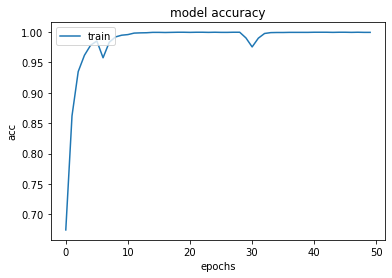

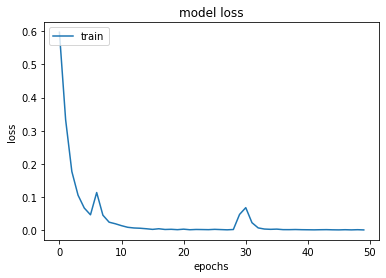

In [52]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = f_model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

9/9 [==============================] - 0s 6ms/step - loss: 1.7631 - acc: 0.7683
score: 1.76
acc: 0.77


In [54]:
# evaluate the model
_, train_acc = f_model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = f_model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

154/154 - 1s - loss: 6.1944e-04 - acc: 0.9998
9/9 - 0s - loss: 1.7631 - acc: 0.7683
Train: 1.000, Test: 0.7683


In [55]:
# predict probabilities for test set
yhat_probs = f_model.predict(X_test, verbose=0)
print(yhat_probs)
# predict crisp classes for test set
yhat_classes = f_model.predict_classes(X_test, verbose=0)
print(yhat_classes)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 1

[[9.9999857e-01 1.4514661e-06]
 [6.3996813e-03 9.9360037e-01]
 [1.2339764e-04 9.9987662e-01]
 [9.5346195e-01 4.6538029e-02]
 [9.9999988e-01 7.1745681e-08]
 [5.5561742e-09 1.0000000e+00]
 [4.1824244e-02 9.5817572e-01]
 [9.9888462e-01 1.1154031e-03]
 [9.9999094e-01 9.0374169e-06]
 [2.1333844e-11 1.0000000e+00]
 [2.0948781e-04 9.9979049e-01]
 [8.2545071e-08 9.9999988e-01]
 [9.9999940e-01 5.9560546e-07]
 [2.9978767e-02 9.7002125e-01]
 [8.6871289e-05 9.9991310e-01]
 [9.9999690e-01 3.1403622e-06]
 [9.6826452e-01 3.1735513e-02]
 [1.0216028e-01 8.9783973e-01]
 [3.9923307e-06 9.9999607e-01]
 [5.3006160e-01 4.6993834e-01]
 [9.8977613e-01 1.0223834e-02]
 [3.0965621e-06 9.9999690e-01]
 [2.1371242e-02 9.7862875e-01]
 [2.0921806e-07 9.9999976e-01]
 [9.9994171e-01 5.8259640e-05]
 [9.2303848e-01 7.6961517e-02]
 [9.9832231e-01 1.6776857e-03]
 [5.1244725e-03 9.9487549e-01]
 [2.7852928e-07 9.9999976e-01]
 [9.9903369e-01 9.6631091e-04]
 [9.9771923e-01 2.2807242e-03]
 [2.4392509e-08 1.0000000e+00]
 [3.5881

[0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0
 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0
 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0
 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1
 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1]


In [56]:
def get_result(txt):
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)
    pred = f_model.predict(padded)
    labels = [0,1]
    result = labels[np.argmax(pred)]
    result_dict = {0: 'negative' , 1: 'positive'}
    print(result)
    return result_dict[result]

In [58]:
m = "The local electronics industry is expected to remain stable amid layoff concerns surrounding Japanese electronics giants operating in the country, an official says."
get_result([m])

1


'positive'

In [59]:
m = "The local electronics industry is amid layoff concerns and last year has laid off tens of employees"
get_result([m])

0


'negative'

In [60]:
import tweepy as tw
from tweepy import OAuthHandler

consumer_key = 'r0kB0712EEOZT3jcVS7t74rfV'
consumer_secret = 'LIVOMWnwm47bpDnk0QjkuAmmY6QgO98P3vBhggEUhtM2Y4dTPo'
access_token = '1051487401451900928-czLgwZmGKlEyiZ33VorWXgeewRgPg8'
access_token_secret = 'JBCjSS6Ee8OW3qlDX2HTTI5ot2fX3lwjqlziLuJ4vdL8j'

In [61]:
try:
    auth = tw.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tw.API(auth)
except:
    print("Error: Authentication Failed")

In [62]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)


In [63]:
def isEnglish(text):
    try:
        text.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [64]:
from datetime import datetime, timedelta

now = datetime.today().now()
prev=now-timedelta(days=1)
now=now.strftime("%Y-%m-%d")
prev=prev.strftime("%Y-%m-%d")
prev

'2021-06-29'

In [65]:
def get_tweets(query, count):
    tweets = []
    query = query + " -filter:retweets"
    try:
        fetched_tweets = tw.Cursor(api.search, 
                                   q = query, 
                                   lang = 'en',
                                  since = prev,
                                  until = now).items(count)
        for tweet in fetched_tweets:
            parsed_tweet = {}
            print(tweet.text)
            if isToxic([tweet.text]) == 0:
                parsed_tweet['text'] = preprocess_text(tweet.text)
                parsed_tweet['sentiment'] = get_result([preprocess_text(tweet.text)])
                if tweet.retweet_count > 0:
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)       
                else:
                    tweets.append(parsed_tweet)            
        return tweets   
    except tw.TweepError as e:
        print("Error : " + str(e))

In [66]:
key = "#" + input ("Enter key or hashtag to search about: ")
numberOfTweets = int(input("Enter how many tweets to analyze: "))

Enter key or hashtag to search about: btc
Enter how many tweets to analyze: 500


In [67]:
tweets = get_tweets(key, numberOfTweets)
pzt_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
neg_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']


@CentralBank_TR Please don‘t miss the train and buy #BTC in worth of 10+ Billion to not only leverage the financial… https://t.co/WnL6D6fNgE
Not toxic
0
The biggest problem in the crypto space
https://t.co/l8MQK29e5P
#Canada #USA #Economics #Bitcoin #BTC #Crypto… https://t.co/5vESbTOHdE
Not toxic
1
🌍 so it Begins👁👀 #BTC #USDC #dogecoin https://t.co/drZzTV7jsm
Toxic
$BTC #BTC #BITCOIN 

They way to really make BTC viewed as money, is to stop speaking in terms of “Bitcoin” and spe… https://t.co/d1ojhee2Mc
Not toxic
1
1 hour top movers report #blockchain #crypto #cryptocurrency #cryptocurrencies #cryptonews #cryptotrading #trading… https://t.co/RnQkw0kCkd
Not toxic
0
Daily top movers report #blockchain #crypto #cryptocurrency #cryptocurrencies #cryptonews #cryptotrading #trading… https://t.co/vYhObDO1F6
Not toxic
0
4 hour top movers report #blockchain #crypto #cryptocurrency #cryptocurrencies #cryptonews #cryptotrading #trading… https://t.co/7ABSzFoZDc
Not toxic
0
Best new token in Crypto

Not toxic
0
#BTC Puell Multiple again give a buy signal. The last 4 signals will result in big rallies in the past. The fundame… https://t.co/E3E4jp71uU
Toxic
Best new token in Crypto!

#iBNB is the FIRST #DeFi Token to implement a Dynamic Tax Protocol that provides Sustain… https://t.co/a6us4GkqQG
Not toxic
1
@AdnansArk $ANY 3rd Quarter will be Showtime from @omnipotent32 and @GryphonMining IMHO
#bitcoinmining… https://t.co/v81sdQhWog
Not toxic
0
I still don’t understand why people still buy $ICP. It’s a ticking time bomb. #btc
Not toxic
1
@LeverageMonkey 🚨 🚨 🚨  1,000 #BTC (35,970,815 USD) transferred from #Coinbase to unknown wallet
Details

Now what
Not toxic
1
Plot twist—I think this is the perfect storm ⛈ for institutions to sell high and buy low #bitcoin #btc #crypto… https://t.co/qXl0oQXm1c
Not toxic
1
Banks are fax machines

Ethereum is the internet

#Ethereum 
#BTC 
#XRP 
#vchain #vet #vthor
Not toxic
0
didn’t Burry, mr. short, himself, call this #btc structure an ‘obvious’ h&

0
@tolstoybb Now that the #crypto market is opening up further, it still behooves you investing smartly. 

Find out h… https://t.co/cHJxpNKvsX
Not toxic
1
@drewj_thinks @nicole_maffeo @rleshner @LittleRed04 @HartmutNeven @wasabiwallet No offense Drew, 
But at this point… https://t.co/sSa990yJPz
Not toxic
0
The early majority slowly but surely shifting onside #BTC #FTX https://t.co/2bAKi8X68j
Toxic
$XTZ is bouncing perfectly off its 99 MA, people don't realize this coin will be $20 minimum within a year or two.… https://t.co/ktkzvzheXl
Not toxic
0
@gv_token Great team and excellent devs. This project is awesome. We are going to the moon. I am so excited now to… https://t.co/FaNGQMEcB2
Not toxic
1
@Cryptoium_ @Paul08113166 @julianhosp @danheld @defichain @cakedefi @saiivelive oh #dfi Happy-Lambo-Rich-Bots in da… https://t.co/8ecwNQXQ1i
Not toxic
0
@davidgokhshtein RISE AND SHINE ASIA!

Now that the #crypto market is opening up further, it still behooves you inv… https://t.co/mB0MQVfE5x
N

Not toxic
1
@OrlamboMoon Have you heard about $ZNN? 8.6M Max supply and 60M Mcap, this is a real gem.
Tell me why you aren't in… https://t.co/a3ZOIMJwQG
Not toxic
1
🚨🚨 CRYPTO NEWS ALERT! 🚨🚨

China crackdown shows industrial Bitcoin mining a problem for decentralization… https://t.co/vaO0P0pZmf
Not toxic
0
@giftedhandsGHD Thank you for this wonderful giveaway. 

0xac7F27Ad42689816Adc641253BcB2A6502926B2D

@herabitcoin… https://t.co/ahEpMmizLw
Toxic
To get a success, your courage must be greater than your fear. Spirit and work hard with your plan.

Keep working… https://t.co/td7mdco8HE
Not toxic
1
@giftedhandsGHD To get a success, your courage must be greater than your fear. Spirit and work hard with your plan.… https://t.co/JzBdWfTYQw
Not toxic
1
Best new token in Crypto!

#iBNB is the FIRST #DeFi Token to implement a Dynamic Tax Protocol that provides Sustain… https://t.co/F7BdG1P5LX
Not toxic
1
A lot of youtube crypto charlatans making more money from views than actually from their cr

1
Best new token in Crypto!

#iBNB is the FIRST #DeFi Token to implement a Dynamic Tax Protocol that provides Sustain… https://t.co/vlnzrC53aE
Not toxic
1
@loser_coin @digishahed 
@NFT_Maximalist 
@chonkgangsta 

Vote and win some #losercoin. Even when you're winning, y… https://t.co/9KdfU5S30s
Not toxic
1
There's still time to register for our July $VITE airdrop!
👇

#BTC #BNB #ETH #NANO #TRX #ADA #LUNA #XRP #DOGE https://t.co/Lbl5sjmIfj
Toxic
Best new token in Crypto!

#iBNB is the FIRST #DeFi Token to implement a Dynamic Tax Protocol that provides Sustain… https://t.co/VFc33EsxFL
Not toxic
1
Saving the Amazon and Bitcoin all in once @TomBrady #BTC https://t.co/4z6QKmK87D
Not toxic
1
@cryptobrass $ZNN will bring #BTC interoperability... you know what that means right?
Not toxic
1
$RLC
An unusual limit order (sell) added to the order book has been detected.
2021-06-29 11:27PM | $RLC @ 0.00042 B… https://t.co/MGZJ3nLjHT
Not toxic
1
@DarinFeinstein They'd be the richest country in the wo

Not toxic
1
#NZDCAD Target Hit! 90 PIPS Profit 🔥

Check out my Bio to get Telegram link of Free Forex or Crypto Channel. 

Chee… https://t.co/Tq81PzvWQe
Not toxic
1
🚨 What Crypto Should You Buy? Jim Cramer Says Ethereum - https://t.co/pHnL5mhwTB #BTC #ETH  https://t.co/92T0FwgcSe
Not toxic
1
Best new token in Crypto!

#iBNB is the FIRST #DeFi Token to implement a Dynamic Tax Protocol that provides Sustain… https://t.co/lSGf1qCSMB
Not toxic
1
Good job 
Amazing project and nice team 

@saineiss14
@NurCahy01911365 
@Redunion5

#btc #FREEAirdrop https://t.co/G5l4XFHIrR
Toxic
@JBTheCryptoKing Only diamond hands get rewarded 🙌

#animalsheltersupportcash #asscash #asscasharmy  #BNB #btc
Toxic
@PermissionIO @PermissionIO has really proven to be solution driven project. They're really resilient despite the c… https://t.co/QXGfQtvOXM
Not toxic
1
@CaracalSwap @Hotbit_news Good job 
Amazing project and nice team 

@saineiss14
@NurCahy01911365 
@Redunion5

#btc #FREEAirdrop
Toxic
@ParikPatelCFA The

Not toxic
1
@Frank_Giustra @michael_saylor @DanielaCambone #Bitcoin is the only asset that persists through FUD and crash, and… https://t.co/YDazM9PYPI
Not toxic
0
#BTC One more try @ 36,5K
Some buying pressure coming https://t.co/ACeyzMt1UE
Not toxic
0
19.10.2021 BTC price? 
#bitcoin #BTC #Ethereum #eth #XRPCommunity #xrp #Ripple #dogecoin #doge #DogecoinToTheMoon… https://t.co/hgrefpJHMh
Not toxic
0
@DarinFeinstein There are 46.8 million millionaires in the world. There are only 21 million #Bitcoin 
Less than hal… https://t.co/ibn9I3HngQ
Not toxic
0
#btc dumping donnuts 🍩🩸 https://t.co/TBnXGwqcNB
Not toxic
0
Bitcoin BTC Current Price:
$35,914.94

1h: -0.80%
24h: +4.48%
7d: +9.98%
30d: +0.31%

#btc #bitcoin
Toxic
El Salvador Gov’t: We’re Giving out Bitcoin – but Don’t Convert it to Fiat https://t.co/n9loV3iv67 #cryptocurrency #Bitcoin #BTC #UpCoins
Not toxic
0
@PeterMcCormack There are 46.8 million millionaires in the world. There are only 21 million #Bitcoin 
Less than hal… https://t

Not toxic
1
https://t.co/YDXGulQRto This is what r/CryptoCurrency looked like in 2013 https://t.co/ZxFYwtlLYX #blockchain #btc #Dogearmy
Not toxic
1
#Ethereum hourly net stats.
10pm - 11pm UTC
blocks:291
avgDiff:6.22 PH
hashRate:523.44 TH/s
avgSize:53.94 KB
txns:52872
#ETH #BTC #crypto
Toxic
🕗 Jun 29, 2021 8:00 PM
🇦🇷 $171.32 ARS/USD +1.85%⬆️
Premium: 79.01%
Avg 24h: $169.72 ARS/USD
₿: $6,162,883 ARS/BTC +… https://t.co/esOLYd7t9i
Not toxic
1
Another 30% jump for Cardano? Here’s why it’s possible 

#Cardano #cardanofeed #ADA #crypto #cardanocommunity… https://t.co/tHm4WiFYnA
Toxic
@michael_saylor Gold has been actual "money" for 5,000+ years, which is a pretty solid history, but your folly in… https://t.co/J41SgbXkWL
Toxic
FARM is listed on an exchange where you can fill your wallet! As time goes on and as this project grows, this list… https://t.co/bqEQE2QVfX
Toxic
Looking for a in-depth TG Crypto group that is dedicated to #VeChain amongst other blockchain ?  With Over 1k+  act… https

Not toxic
0
This is HUGGGEEEE!! #MASSIVE #Ethereum has leaped #BTC Just wow!!! Great job #SAFEMOONARMY and Congratulations to… https://t.co/fUZtyJsYoL
Not toxic
1
Like clockwork bois

#BTC back in da range https://t.co/CcJqtqdrw3
Not toxic
0
Short from 36k looking for 33k 🤪 #btc
Toxic
@ShibInformer @certikorg Over 246%+ Profits from #Ethereum signal within 2 hour. you can check the time of signal e… https://t.co/IBw5QsR52l
Toxic
@ave_eli Similar to WBTC, how do they keep it pegged to BTC? Does that mean you can just invest in WBTC and have th… https://t.co/AJYTGhSaC0
Not toxic
1
👉https://t.co/E10l0k5pab #amazon👈
💯👉Auto Follower👈💯
💯👉#自動相互フォロー👈💯

#btc
##England
##Wiley
##Cory
#拡散希望RTお願いします… https://t.co/xzhQslfrYd
Not toxic
0
https://t.co/wRIJUss5iu “This #Bitcoin technology will destroy your favourite altcoin” https://t.co/GKdwQRrFTd #btc #free #mining
Not toxic
1
@denverbitcoin @maxkeiser How do senators become multi-million ares after a few years in the senate on 175k annual… https://

In [68]:
pzt_tweets

[{'text': 'The biggest problem crypto space Canada USA Economics Bitcoin BTC Crypto…',
  'sentiment': 'positive'},
 {'text': 'BTC BTC BITCOIN They way really make BTC viewed money stop speaking terms “ Bitcoin ” spe…',
  'sentiment': 'positive'},
 {'text': 'Best new token Crypto iBNB FIRST DeFi Token implement Dynamic Tax Protocol provides Sustain…',
  'sentiment': 'positive'},
 {'text': 'We rise lifting others Its time rise btc EverRise RISE giveaway bnb TOTHEMOON binance crypto BULLISH',
  'sentiment': 'positive'},
 {'text': 'Book Now Summer 2 Hours LA Lake view house California outdoor fun amp RemoteWork Sequoias river…',
  'sentiment': 'positive'},
 {'text': 'They follow El Salvadors policy BTC plan', 'sentiment': 'positive'},
 {'text': 'Frank mantra “ maintain status quo ” works for…',
  'sentiment': 'positive'},
 {'text': 'Great team excellent devs This project awesome We going moon I excited to…',
  'sentiment': 'positive'},
 {'text': '🐋🐋🐋🐋 2419 BTC 84618742 USD transfered unkno

In [69]:
neg_tweets

[{'text': 'Please ‘ miss train buy BTC worth 10 Billion leverage financial…',
  'sentiment': 'negative'},
 {'text': '1 hour top movers report blockchain crypto cryptocurrency cryptocurrencies cryptonews cryptotrading trading…',
  'sentiment': 'negative'},
 {'text': 'Daily top movers report blockchain crypto cryptocurrency cryptocurrencies cryptonews cryptotrading trading…',
  'sentiment': 'negative'},
 {'text': '4 hour top movers report blockchain crypto cryptocurrency cryptocurrencies cryptonews cryptotrading trading…',
  'sentiment': 'negative'},
 {'text': 'Its punching poc easily lads BTC', 'sentiment': 'negative'},
 {'text': 'Sometimes travel long way find near Paulo Coelho X bitcoin BTC',
  'sentiment': 'negative'},
 {'text': 'huge fan reason im btc wrote', 'sentiment': 'negative'},
 {'text': 'EarthToMoon Moon Mission LFG ETM 😍💎🚀 EverGive EverApe EverRise MoonRise HODL…',
  'sentiment': 'negative'},
 {'text': '700000 Malta Crypto Theft Case Reaches Court Bitcoin Btc Cryptocurrency

In [70]:
print("Positive tweets percentage: {} %".format(percentage(len(pzt_tweets),len(tweets))))
print("Negative tweets percentage: {} %".format(percentage(len(neg_tweets),len(tweets))))

Positive tweets percentage: 62.14099216710183 %
Negative tweets percentage: 37.85900783289817 %


In [71]:
positive_p = percentage(len(pzt_tweets),len(tweets))
negative_p = percentage(len(neg_tweets),len(tweets))
positive_p = format(positive_p,'.2f')
negative_p = format(negative_p,'.2f')
print("Positive tweets percentage:  %" + positive_p)
print("Negative tweets percentage:  %" + negative_p)

Positive tweets percentage:  %62.14
Negative tweets percentage:  %37.86


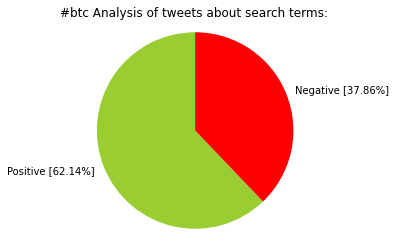

In [72]:
labels = ['Positive ['+str(positive_p)+'%]','Negative ['+str(negative_p)+'%]']
sizes = [positive_p, negative_p]
colors = ['yellowgreen','red']
fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,startangle=90,colors=colors)
plt.title(key + " " + "Analysis of tweets about search terms: ")
ax.axis('equal')

plt.show()